In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
import pingouin
import seaborn as sns
import numpy as np
import matplotlib

font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
data = pd.read_csv("ECG_study_new.csv", header=0).drop(columns="Unnamed: 0")
data.columns = [re.sub(r"\.[0-9]*", "", x) for x in data.columns]
data

,HD1,HD2,FHD,Appropriateness,Comprehensibility,Utility,AI,XAI,HD1,HD2,...,AI,XAI,Group,Expertise,Trust1,Trust2,email,Accuracy (HD1),Accuracy (HD2),Accuracy (FHD)
0,1.0,1.0,1.0,5.0,4.0,5.0,1.0,1.0,0.0,1.0,...,0.0,1.0,Hound,1.0,4.0,5.0,luca.martini@student.unisi.it,0.20,0.45,0.50
1,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,0.0,1.0,...,0.0,1.0,Hound,1.0,3.0,5.0,c.salvatici@student.unisi.it,0.30,0.55,0.60
2,1.0,1.0,1.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,...,0.0,1.0,Hound,1.0,5.0,6.0,gabriele.olivoni@student.unisi.it,0.65,0.65,0.65
3,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,1.0,...,0.0,1.0,Hound,2.0,3.0,3.0,carlotta.sciaccaluga@gmail.com,0.75,0.75,0.75
4,1.0,1.0,1.0,5.0,6.0,6.0,1.0,1.0,1.0,1.0,...,0.0,1.0,Hound,1.0,3.0,4.0,m.collantoni1@student.unisi.it,0.65,0.75,0.75
5,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,1.0,1.0,...,0.0,1.0,Hound,2.0,3.0,4.0,devivooreste@gmail.com,0.60,0.70,0.70
6,1.0,1.0,1.0,4.0,6.0,4.0,1.0,1.0,0.0,1.0,...,0.0,1.0,Hound,1.0,4.0,4.0,f.marrese@student.unisi.it,0.25,0.55,0.60
7,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.0,1.0,Hound,2.0,3.0,3.0,s.pistoresi@virgilio.it,0.65,0.65,0.65
8,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,0.0,0.0,...,0.0,1.0,Hound,2.0,3.0,3.0,francescocontorni01@gmail.com,0.60,0.65,0.65
9,1.0,1.0,1.0,5.0,6.0,4.0,1.0,1.0,0.0,0.0,...,0.0,1.0,Hound,2.0,4.0,3.0,giulia.biagioni13@gmail.com,0.55,0.55,0.60


In [3]:
trust_exp = data.loc[:,["Expertise","Trust1","Trust2"]]
trust_exp.columns = ["Expertise", "Initial", "Final"]
trust_exp = trust_exp.melt(id_vars="Expertise")
trust_exp.columns = ["Expertise", "Trust", "value"]
trust_exp

,Expertise,Trust,value
0,1.0,Initial,4.0
1,1.0,Initial,3.0
2,1.0,Initial,5.0
3,2.0,Initial,3.0
4,1.0,Initial,3.0
...,...,...,...
83,1.0,Final,4.0
84,1.0,Final,NaN
85,2.0,Final,4.0
86,1.0,Final,5.0


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

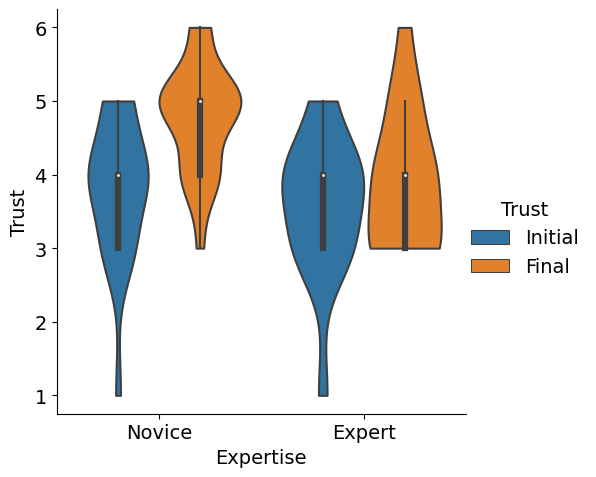

In [4]:
plt.figure(figsize=(5,5))
sns.catplot(data=trust_exp, x="Expertise", y="value", hue="Trust", cut=0, kind="violin")
plt.xticks([0,1], ["Novice", "Expert"])
plt.ylabel("Trust")
plt.savefig("trust_exp_violin.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

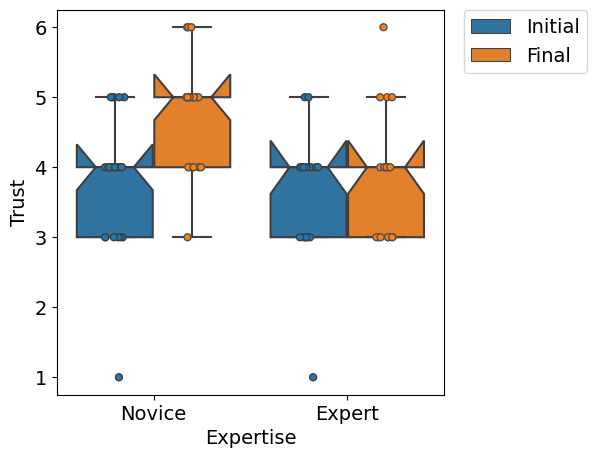

In [5]:
plt.figure(figsize=(5,5))
sns.boxplot(data=trust_exp, x="Expertise", y="value", hue="Trust", notch=True, showfliers=False)
ax = sns.stripplot(data=trust_exp, x="Expertise", y="value", hue="Trust", dodge=True, edgecolor='gray', linewidth=1)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks([0,1], ["Novice", "Expert"])
plt.ylabel("Trust")
plt.savefig("trust_exp_box.png", dpi=300, bbox_inches="tight")

In [6]:
trust_prot = data.loc[:,["Group", "Expertise", "Trust1","Trust2"]]
trust_prot.columns = ["Protocol", "Expertise", "Initial", "Final"]
trust_prot = trust_prot.melt(id_vars=["Protocol","Expertise"])
trust_prot.columns = ["Protocol", "Expertise", "Trust", "value"]
trust_prot

,Protocol,Expertise,Trust,value
0,Hound,1.0,Initial,4.0
1,Hound,1.0,Initial,3.0
2,Hound,1.0,Initial,5.0
3,Hound,2.0,Initial,3.0
4,Hound,1.0,Initial,3.0
...,...,...,...,...
83,Ram,1.0,Final,4.0
84,Ram,1.0,Final,NaN
85,Ram,2.0,Final,4.0
86,Ram,1.0,Final,5.0


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

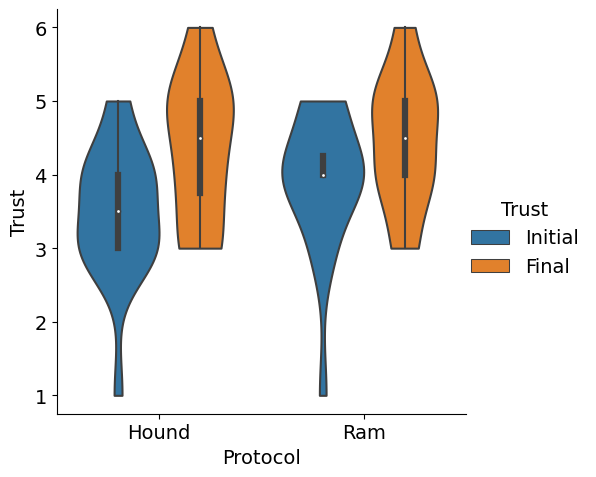

In [7]:
plt.figure(figsize=(5,5))
sns.catplot(data=trust_prot, x="Protocol", y="value", hue="Trust", cut=0, kind="violin")
#plt.xticks([0,1], ["Novice", "Expert"])
plt.ylabel("Trust")
plt.savefig("trust_prot_violin.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

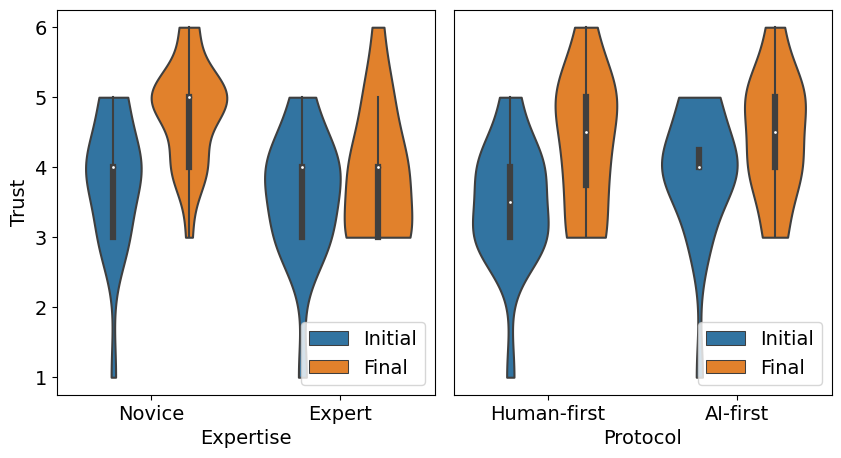

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0)

v1 = sns.violinplot(data=trust_exp, x="Expertise", y="value", hue="Trust", cut=0, ax=ax1, legend=False)
v2 = sns.violinplot(data=trust_prot, x="Protocol", y="value", hue="Trust", cut=0, ax=ax2, legend=False)

ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
#v2.legend_.remove()

ax1.set_ylabel("Trust")
ax2.set_ylabel("")

ax1.set_xticks([0,1], ["Novice", "Expert"])
ax2.set_xticks([0,1], ["Human-first", "AI-first"])
ax2.set_yticks([])
ax2.set_yticklabels([])

plt.savefig("trust.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

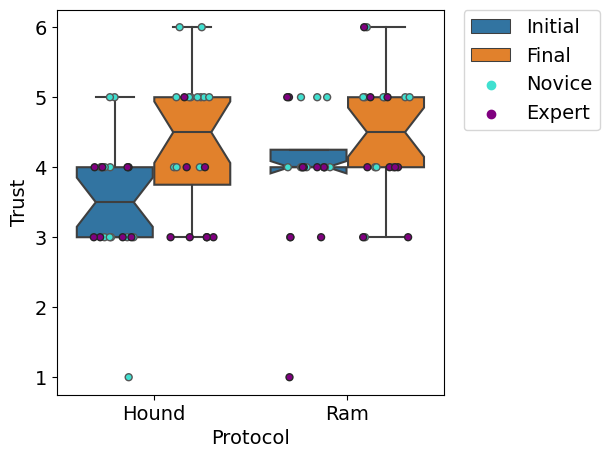

In [9]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=trust_prot, x="Protocol", y="value", hue="Trust", notch=True, showfliers=False)

color = ["turquoise", "purple"]

sns.stripplot(data=trust_prot[trust_prot["Expertise"] == 1], x="Protocol", y="value",
              hue="Trust", dodge=True, edgecolor='gray', linewidth=1, palette=[color[0]] * 2,
             jitter=0.25)

sns.stripplot(data=trust_prot[trust_prot["Expertise"] == 2], x="Protocol", y="value",
              hue="Trust", dodge=True, edgecolor='gray', linewidth=1, palette=[color[1]] * 2,
             jitter=0.25)

handles, labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1], handles[2], handles[4]]
labels = [labels[0], labels[1], "Novice", "Expert"]
l = plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Trust")
plt.savefig("trust_prot_exp_box.png", dpi=300, bbox_inches="tight")

In [10]:
tests = []
effects = []

tests.append( stats.wilcoxon(data[data["Expertise"] == 1]["Trust1"], data[data["Expertise"] == 1]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.wilcoxon(data[data["Expertise"] == 1]["Trust1"],
                                 data[data["Expertise"] == 1]["Trust2"])["RBC"])

tests.append( stats.wilcoxon(data[data["Expertise"] == 2]["Trust1"], data[data["Expertise"] == 2]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.wilcoxon(data[data["Expertise"] == 2]["Trust1"],
                                 data[data["Expertise"] == 2]["Trust2"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Expertise"] == 1]["Trust1"], data[data["Expertise"] == 2]["Trust1"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Expertise"] == 1]["Trust1"],
                                 data[data["Expertise"] == 2]["Trust1"])["RBC"])

tests.append(stats.mannwhitneyu(data[data["Expertise"] == 1]["Trust2"], data[data["Expertise"] == 2]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Expertise"] == 1]["Trust2"],
                                 data[data["Expertise"] == 2]["Trust2"])["RBC"])




tests.append( stats.wilcoxon(data[data["Group"] == "Ram"]["Trust1"], data[data["Group"] == "Ram"]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.wilcoxon(data[data["Group"] == "Ram"]["Trust1"],
                                 data[data["Group"] == "Ram"]["Trust2"])["RBC"])

tests.append( stats.wilcoxon(data[data["Group"] == "Hound"]["Trust1"], data[data["Group"] == "Hound"]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.wilcoxon(data[data["Group"] == "Hound"]["Trust1"],
                                 data[data["Group"] == "Hound"]["Trust2"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Group"] == "Hound"]["Trust1"], data[data["Group"] == "Ram"]["Trust1"],
                  nan_policy="omit").pvalue )

tests.append(stats.mannwhitneyu(data[data["Group"] == "Hound"]["Trust2"], data[data["Group"] == "Ram"]["Trust2"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Group"] == "Hound"]["Trust1"],
                                 data[data["Group"] == "Ram"]["Trust1"])["RBC"])
effects.append(pingouin.mwu(data[data["Group"] == "Hound"]["Trust2"],
                                 data[data["Group"] == "Ram"]["Trust2"])["RBC"])

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal

In [11]:
from statsmodels.stats import multitest as multi

corrected = multi.multipletests(tests, method="fdr_bh")[1]

In [12]:
var = ["Expertise", "Group"]
group = [["Novice","Novice"], ["Expert", "Expert"], ["Novice","Expert"], ["Novice","Expert"],
         ["Ram", "Ram"], ["Hound","Hound"], ["Hound","Ram"],["Hound","Ram"]]
trust = [["Initial", "Final"], ["Initial", "Final"], ["Initial", "Initial"], ["Final", "Final"]]

i = 0
for v in range(2):
    for g in range(4):
        print("%s %s (%s) vs %s (%s): %.3f (%.2f)" % (var[v],
                                               str(group[v*4 + g][0]),
                                               trust[g][0],
                                               str(group[v*4 + g][1]),
                                               trust[g][1],
                                               corrected[i],
                                               effects[i]))
        i+=1

Expertise Novice (Initial) vs Novice (Final): 0.004 (-0.92)
Expertise Expert (Initial) vs Expert (Final): 0.407 (-0.35)
Expertise Novice (Initial) vs Expert (Initial): 0.439 (-0.15)
Expertise Novice (Final) vs Expert (Final): 0.009 (-0.54)
Group Ram (Initial) vs Ram (Final): 0.078 (-0.60)
Group Hound (Initial) vs Hound (Final): 0.016 (-0.81)
Group Hound (Initial) vs Ram (Initial): 0.090 (0.33)
Group Hound (Final) vs Ram (Final): 0.787 (0.05)


In [13]:
data["Appr"] = data["Appropriateness"].mean(axis=1)
data["Compr"] = data["Comprehensibility"].mean(axis=1)
data["Util"] = data["Utility"].mean(axis=1)
data["Quality"] = np.nanmean((data["Appropriateness"].values + data["Comprehensibility"].values + data["Utility"].values)/3, axis=1)
pos_dom = ((data["FHD"].values - data["HD1"].values) == 1).sum(axis=1)
neg_dom = ((data["FHD"].values - data["HD1"].values) == -1).sum(axis=1)
data["Positive Dominance"] = pos_dom
data["Negative Dominance"] = neg_dom
data["Dominance"] = data["Positive Dominance"] + data["Negative Dominance"]
data

,HD1,HD2,FHD,Appropriateness,Comprehensibility,Utility,AI,XAI,HD1,HD2,...,Accuracy (HD1),Accuracy (HD2),Accuracy (FHD),Appr,Compr,Util,Quality,Positive Dominance,Negative Dominance,Dominance
0,1.0,1.0,1.0,5.0,4.0,5.0,1.0,1.0,0.0,1.0,...,0.20,0.45,0.50,4.300000,4.900000,4.300000,4.500000,6,0,6
1,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,0.0,1.0,...,0.30,0.55,0.60,5.600000,5.700000,5.200000,5.500000,7,1,8
2,1.0,1.0,1.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,...,0.65,0.65,0.65,5.200000,5.300000,5.600000,5.366667,1,1,2
3,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,1.0,...,0.75,0.75,0.75,4.450000,4.500000,4.300000,4.416667,0,0,0
4,1.0,1.0,1.0,5.0,6.0,6.0,1.0,1.0,1.0,1.0,...,0.65,0.75,0.75,3.750000,4.300000,4.100000,4.050000,2,0,2
5,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,1.0,1.0,...,0.60,0.70,0.70,4.650000,4.700000,4.315789,4.508772,2,0,2
6,1.0,1.0,1.0,4.0,6.0,4.0,1.0,1.0,0.0,1.0,...,0.25,0.55,0.60,4.368421,5.263158,4.473684,4.701754,7,0,7
7,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,0.65,0.65,0.65,2.944444,2.833333,2.555556,2.777778,0,0,0
8,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,0.0,0.0,...,0.60,0.65,0.65,3.800000,3.900000,3.800000,3.833333,1,0,1
9,1.0,1.0,1.0,5.0,6.0,4.0,1.0,1.0,0.0,0.0,...,0.55,0.55,0.60,3.894737,3.850000,2.900000,3.508772,1,0,1


In [14]:
appr_exp = data.loc[:,["Expertise","Appr", "Compr","Util","Quality"]]
appr_exp.columns = ["Expertise", "Appropriateness", "Comprehensibility", "Utility", "Quality"]
appr_exp = appr_exp.melt(id_vars="Expertise")
appr_exp

,Expertise,variable,value
0,1.0,Appropriateness,4.300000
1,1.0,Appropriateness,5.600000
2,1.0,Appropriateness,5.200000
3,2.0,Appropriateness,4.450000
4,1.0,Appropriateness,3.750000
...,...,...,...
171,1.0,Quality,3.300000
172,1.0,Quality,5.000000
173,2.0,Quality,3.571429
174,1.0,Quality,4.516667


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

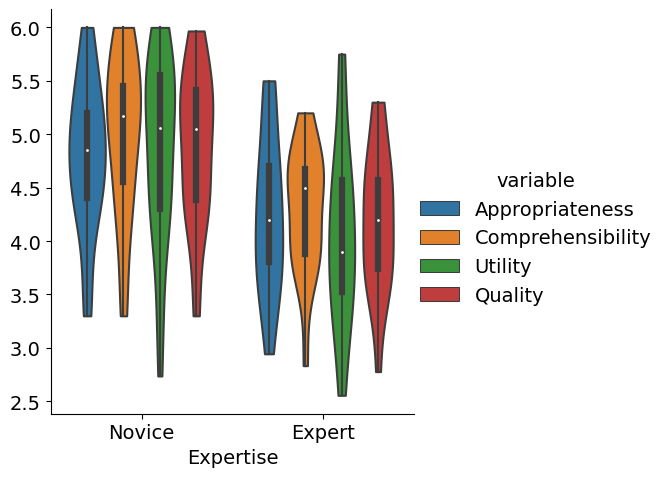

In [15]:
plt.figure(figsize=(5,5))
sns.catplot(data=appr_exp, x="Expertise", y="value", hue="variable", cut=0, kind="violin")
plt.xticks([0,1], ["Novice", "Expert"])
plt.ylabel("")
plt.savefig("quali_exp_violin.png", dpi=300, bbox_inches="tight")

In [16]:
appr_prot = data.loc[:,["Group","Appr", "Compr","Util","Quality"]]
appr_prot.columns = ["Protocol", "Appropriateness", "Comprehensibility", "Utility","Quality"]
appr_prot = appr_prot.melt(id_vars="Protocol")
appr_prot

,Protocol,variable,value
0,Hound,Appropriateness,4.300000
1,Hound,Appropriateness,5.600000
2,Hound,Appropriateness,5.200000
3,Hound,Appropriateness,4.450000
4,Hound,Appropriateness,3.750000
...,...,...,...
171,Ram,Quality,3.300000
172,Ram,Quality,5.000000
173,Ram,Quality,3.571429
174,Ram,Quality,4.516667


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

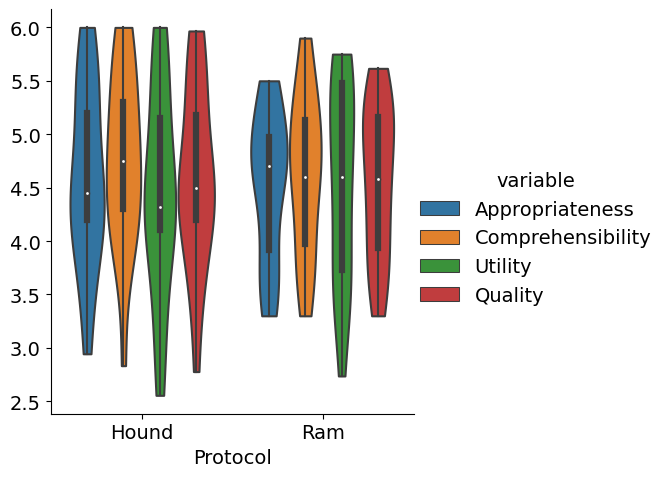

In [17]:
plt.figure(figsize=(5,5))
sns.catplot(data=appr_prot, x="Protocol", y="value", hue="variable", cut=0, kind="violin")
#plt.xticks([0,1], ["Novice", "Expert"])
plt.ylabel("")
plt.savefig("quali_prot_violin.png", dpi=300, bbox_inches="tight")

In [18]:
tests = []
effects = []

tests.append( stats.mannwhitneyu(data[data["Expertise"] == 1]["Appr"], data[data["Expertise"] == 2]["Appr"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Expertise"] == 1]["Appr"],
                            data[data["Expertise"] == 2]["Appr"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Expertise"] == 1]["Compr"], data[data["Expertise"] == 2]["Compr"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Expertise"] == 1]["Compr"],
                            data[data["Expertise"] == 2]["Compr"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Expertise"] == 1]["Util"], data[data["Expertise"] == 2]["Util"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Expertise"] == 1]["Util"],
                            data[data["Expertise"] == 2]["Util"])["RBC"])


tests.append( stats.mannwhitneyu(data[data["Group"] == "Hound"]["Appr"], data[data["Group"] == "Ram"]["Appr"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Group"] == "Hound"]["Appr"],
                            data[data["Group"] == "Ram"]["Appr"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Group"] == "Hound"]["Compr"], data[data["Group"] == "Ram"]["Compr"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Group"] == "Hound"]["Compr"],
                            data[data["Group"] == "Ram"]["Compr"])["RBC"])


tests.append(stats.mannwhitneyu(data[data["Group"] == "Hound"]["Util"], data[data["Group"] == "Ram"]["Util"],
                  nan_policy="omit").pvalue )
effects.append(pingouin.mwu(data[data["Group"] == "Hound"]["Util"],
                            data[data["Group"] == "Ram"]["Util"])["RBC"])

In [19]:
corrected = multi.multipletests(tests, method="fdr_bh")[1]

In [20]:
var = ["Expertise", "Group"]
group = [["Novice","Expert"], ["Hound","Ram"]]
quant = ["Appropriateness", "Comprehensibility", "Utility"]

i = 0
for v in range(2):
    for q in range(3):
        print("[%s] %s (%s) vs %s (%s): %.3f (%.2f)" % (var[v],
                                               str(group[v][0]),
                                               quant[q],
                                               str(group[v][1]),
                                               quant[q],
                                               corrected[i],
                                               effects[i]))
        i+=1

[Expertise] Novice (Appropriateness) vs Expert (Appropriateness): 0.052 (-0.40)
[Expertise] Novice (Comprehensibility) vs Expert (Comprehensibility): 0.011 (-0.56)
[Expertise] Novice (Utility) vs Expert (Utility): 0.016 (-0.50)
[Group] Hound (Appropriateness) vs Ram (Appropriateness): 0.991 (-0.00)
[Group] Hound (Comprehensibility) vs Ram (Comprehensibility): 0.901 (-0.07)
[Group] Hound (Utility) vs Ram (Utility): 0.901 (0.06)


In [21]:
import numpy as np

vals = np.zeros(6)
tests = np.zeros(6)

vals[0], tests[0] = stats.spearmanr(data["Trust1"], data["Appr"], nan_policy="omit")
vals[1], tests[1] = stats.spearmanr(data["Trust1"], data["Compr"], nan_policy="omit")
vals[2], tests[2] = stats.spearmanr(data["Trust1"], data["Util"], nan_policy="omit")
vals[3], tests[3] = stats.pearsonr(data["Appr"], data["Compr"])
vals[4], tests[4] = stats.pearsonr(data["Appr"], data["Util"])
vals[5], tests[5] = stats.pearsonr(data["Compr"], data["Util"])

In [22]:
corrected = multi.multipletests(tests, method="fdr_bh")[1]

In [23]:
print("Spearman \\rho (Initial Trust - Appropriateness): %.2f, p: %.3f" % (vals[0], corrected[0]))
print("Spearman \\rho (Initial Trust - Comprehensibility): %.2f, p: %.3f" % (vals[1], corrected[1]))
print("Spearman \\rho (Initial Trust - Utility): %.2f, p: %.3f" % (vals[2], corrected[2]))

print("Spearman \\rho (Appropriateness - Comprehensibility): %.2f, p: %.3f" % (vals[3], corrected[3]))
print("Spearman \\rho (Appropriateness - Utility): %.2f, p: %.3f" % (vals[4], corrected[4]))
print("Spearman \\rho (Comprehensibility - Utility): %.2f, p: %.3f" % (vals[5], corrected[5]))

Spearman \rho (Initial Trust - Appropriateness): 0.23, p: 0.146
Spearman \rho (Initial Trust - Comprehensibility): 0.24, p: 0.146
Spearman \rho (Initial Trust - Utility): 0.28, p: 0.120
Spearman \rho (Appropriateness - Comprehensibility): 0.88, p: 0.000
Spearman \rho (Appropriateness - Utility): 0.80, p: 0.000
Spearman \rho (Comprehensibility - Utility): 0.79, p: 0.000


In [24]:


data["Migliorati"] = data["Accuracy (FHD)"] > data["Accuracy (HD1)"]

low_quant = np.quantile(data["Accuracy (HD1)"].dropna(), 0.25)
up_quant = np.quantile(data["Accuracy (HD1)"].dropna(), 0.75)

def thresh(val):
    if val <= low_quant:
        return "Low"
    elif val >= up_quant:
        return "High"
    else:
        return "Medium"
    
data["Accurati"] = data["Accuracy (HD1)"] > np.median(data["Accuracy (HD1)"].dropna())

low_quant = np.quantile(data["Trust1"].dropna(), 0.25)
up_quant = np.quantile(data["Trust1"].dropna(), 0.75)

def thresh(val):
    if val <= low_quant:
        return "Low"
    elif val >= up_quant:
        return "High"
    else:
        return "Medium"
    
data["Fiduciosi"] = data["Trust1"] > np.median(data["Trust1"].dropna())
data

,HD1,HD2,FHD,Appropriateness,Comprehensibility,Utility,AI,XAI,HD1,HD2,...,Appr,Compr,Util,Quality,Positive Dominance,Negative Dominance,Dominance,Migliorati,Accurati,Fiduciosi
0,1.0,1.0,1.0,5.0,4.0,5.0,1.0,1.0,0.0,1.0,...,4.300000,4.900000,4.300000,4.500000,6,0,6,True,False,False
1,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,0.0,1.0,...,5.600000,5.700000,5.200000,5.500000,7,1,8,True,False,False
2,1.0,1.0,1.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,...,5.200000,5.300000,5.600000,5.366667,1,1,2,False,True,True
3,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,1.0,1.0,...,4.450000,4.500000,4.300000,4.416667,0,0,0,False,True,False
4,1.0,1.0,1.0,5.0,6.0,6.0,1.0,1.0,1.0,1.0,...,3.750000,4.300000,4.100000,4.050000,2,0,2,True,True,False
5,1.0,1.0,1.0,6.0,6.0,5.0,1.0,1.0,1.0,1.0,...,4.650000,4.700000,4.315789,4.508772,2,0,2,True,True,False
6,1.0,1.0,1.0,4.0,6.0,4.0,1.0,1.0,0.0,1.0,...,4.368421,5.263158,4.473684,4.701754,7,0,7,True,False,False
7,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,2.944444,2.833333,2.555556,2.777778,0,0,0,False,True,False
8,1.0,1.0,1.0,6.0,6.0,6.0,1.0,1.0,0.0,0.0,...,3.800000,3.900000,3.800000,3.833333,1,0,1,True,True,False
9,1.0,1.0,1.0,5.0,6.0,4.0,1.0,1.0,0.0,0.0,...,3.894737,3.850000,2.900000,3.508772,1,0,1,True,False,False


In [25]:
appr_migl = data[data["Group"] == "Hound"].loc[:,["Migliorati","Appr", "Compr","Util","Quality"]]
appr_migl.columns = ["Improved", "Appropriateness", "Comprehensibility", "Utility","Quality"]
appr_migl = appr_migl.melt(id_vars="Improved")
appr_migl

,Improved,variable,value
0,True,Appropriateness,4.300000
1,True,Appropriateness,5.600000
2,False,Appropriateness,5.200000
3,False,Appropriateness,4.450000
4,True,Appropriateness,3.750000
...,...,...,...
79,True,Quality,5.700000
80,True,Quality,4.383333
81,True,Quality,5.950000
82,True,Quality,3.533333


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

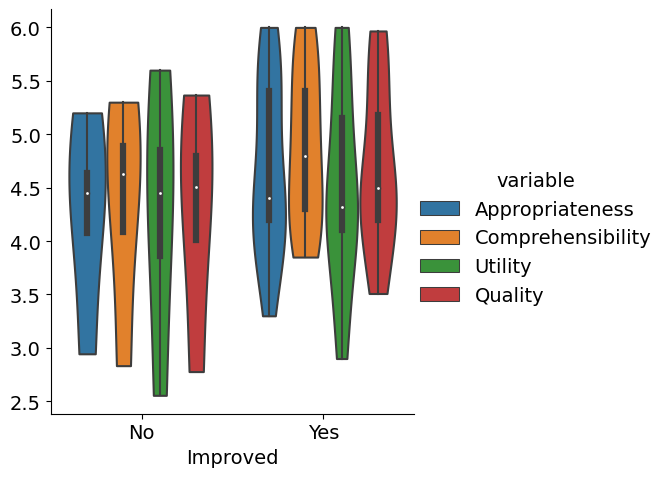

In [26]:
plt.figure(figsize=(5,5))
sns.catplot(data=appr_migl, x="Improved", y="value", hue="variable", cut=0, kind="violin")
plt.xticks([0,1], ["No", "Yes"])
plt.ylabel("")
plt.savefig("quali_impr_violin.png", dpi=300, bbox_inches="tight")

In [27]:
appr_acc = data[data["Group"] == "Hound"].loc[:,["Accurati","Appr", "Compr","Util","Quality"]]
appr_acc.columns = ["Accurate", "Appropriateness", "Comprehensibility", "Utility","Quality"]
appr_acc = appr_acc.melt(id_vars="Accurate")
appr_acc

,Accurate,variable,value
0,False,Appropriateness,4.300000
1,False,Appropriateness,5.600000
2,True,Appropriateness,5.200000
3,True,Appropriateness,4.450000
4,True,Appropriateness,3.750000
...,...,...,...
79,False,Quality,5.700000
80,False,Quality,4.383333
81,False,Quality,5.950000
82,True,Quality,3.533333


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

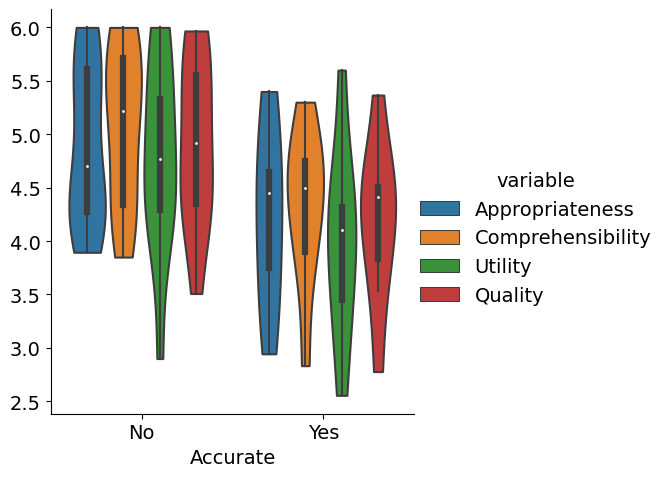

In [28]:
plt.figure(figsize=(5,5))
sns.catplot(data=appr_acc, x="Accurate", y="value", hue="variable", cut=0, kind="violin")
plt.xticks([0,1], ["No", "Yes"])
plt.ylabel("")
plt.savefig("quali_acc_violin.png", dpi=300, bbox_inches="tight")

In [29]:
appr_trust = data[data["Group"] == "Hound"].loc[:,["Fiduciosi","Appr", "Compr","Util","Quality"]]
appr_trust.columns = ["Initial Trust", "Appropriateness", "Comprehensibility", "Utility","Quality"]
appr_trust = appr_trust.melt(id_vars="Initial Trust")
appr_trust

,Initial Trust,variable,value
0,False,Appropriateness,4.300000
1,False,Appropriateness,5.600000
2,True,Appropriateness,5.200000
3,False,Appropriateness,4.450000
4,False,Appropriateness,3.750000
...,...,...,...
79,False,Quality,5.700000
80,False,Quality,4.383333
81,False,Quality,5.950000
82,False,Quality,3.533333


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

<Figure size 500x500 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

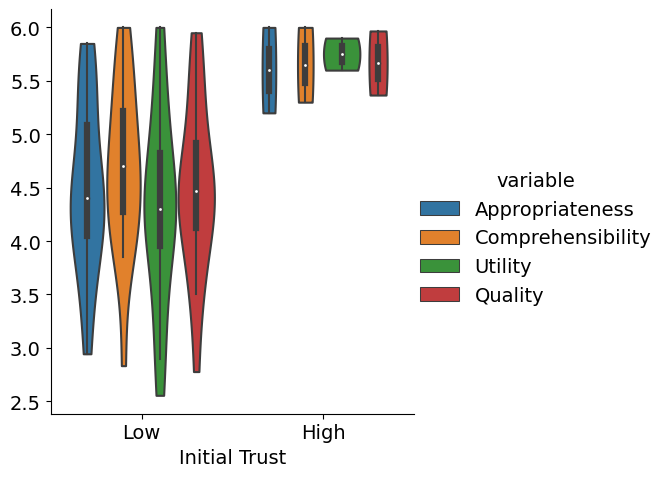

In [30]:
plt.figure(figsize=(5,5))
sns.catplot(data=appr_trust, x="Initial Trust", y="value", hue="variable", cut=0, kind="violin")
plt.xticks([0,1], ["Low", "High"])
plt.ylabel("")
plt.savefig("quali_trust_violin.png", dpi=300, bbox_inches="tight")

In [31]:
tests = []
effects = []

tests.append( stats.mannwhitneyu(data[data["Accurati"] == False]["Appr"], data[data["Accurati"] == True]["Appr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Accurati"] == False]["Appr"], data[data["Accurati"] == True]["Appr"])["RBC"] )

tests.append( stats.mannwhitneyu(data[data["Accurati"] == False]["Compr"], data[data["Accurati"] == True]["Compr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Accurati"] == False]["Compr"], data[data["Accurati"] == True]["Compr"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Accurati"] == False]["Util"], data[data["Accurati"] == True]["Util"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Accurati"] == False]["Util"], data[data["Accurati"] == True]["Util"])["RBC"] )


tests.append( stats.mannwhitneyu(data[data["Migliorati"] == False]["Appr"], data[data["Migliorati"] == True]["Appr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Migliorati"] == False]["Appr"], data[data["Migliorati"] == True]["Appr"])["RBC"] )

tests.append( stats.mannwhitneyu(data[data["Migliorati"] == False]["Compr"], data[data["Migliorati"] == True]["Compr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Migliorati"] == False]["Compr"], data[data["Migliorati"] == True]["Compr"])["RBC"])

tests.append( stats.mannwhitneyu(data[data["Migliorati"] == False]["Util"], data[data["Migliorati"] == True]["Util"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Migliorati"] == False]["Util"], data[data["Migliorati"] == True]["Util"])["RBC"] )



tests.append( stats.mannwhitneyu(data[data["Fiduciosi"] == False]["Appr"], data[data["Fiduciosi"] == True]["Appr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Fiduciosi"] == False]["Appr"], data[data["Fiduciosi"] == True]["Appr"])["RBC"] )

tests.append( stats.mannwhitneyu(data[data["Fiduciosi"] == False]["Compr"], data[data["Fiduciosi"] == True]["Compr"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Fiduciosi"] == False]["Compr"], data[data["Fiduciosi"] == True]["Compr"])["RBC"])


tests.append( stats.mannwhitneyu(data[data["Fiduciosi"] == False]["Util"], data[data["Fiduciosi"] == True]["Util"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Fiduciosi"] == False]["Util"], data[data["Fiduciosi"] == True]["Util"])["RBC"] )


In [32]:
corrected = multi.multipletests(tests, method="fdr_bh")[1]

In [33]:
var = ["Accurate", "Improved", "Initial Trust"]
group = [["No","Yes"], ["No","Yes"], ["Low","High"]]
quant = ["Appropriateness", "Comprehensibility", "Utility"]

i = 0
for v in range(3):
    for q in range(3):
        print("[%s] %s (%s) vs %s (%s): %.3f (%.2f)" % (var[v],
                                                       str(group[v][0]),
                                                       quant[q],
                                                       str(group[v][1]),
                                                       quant[q],
                                                       corrected[i],
                                                       effects[i]))
        i+=1

[Accurate] No (Appropriateness) vs Yes (Appropriateness): 0.231 (-0.31)
[Accurate] No (Comprehensibility) vs Yes (Comprehensibility): 0.231 (-0.33)
[Accurate] No (Utility) vs Yes (Utility): 0.155 (-0.40)
[Improved] No (Appropriateness) vs Yes (Appropriateness): 0.797 (0.07)
[Improved] No (Comprehensibility) vs Yes (Comprehensibility): 0.566 (0.14)
[Improved] No (Utility) vs Yes (Utility): 0.866 (-0.03)
[Initial Trust] Low (Appropriateness) vs High (Appropriateness): 0.145 (0.48)
[Initial Trust] Low (Comprehensibility) vs High (Comprehensibility): 0.145 (0.49)
[Initial Trust] Low (Utility) vs High (Utility): 0.088 (0.63)


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

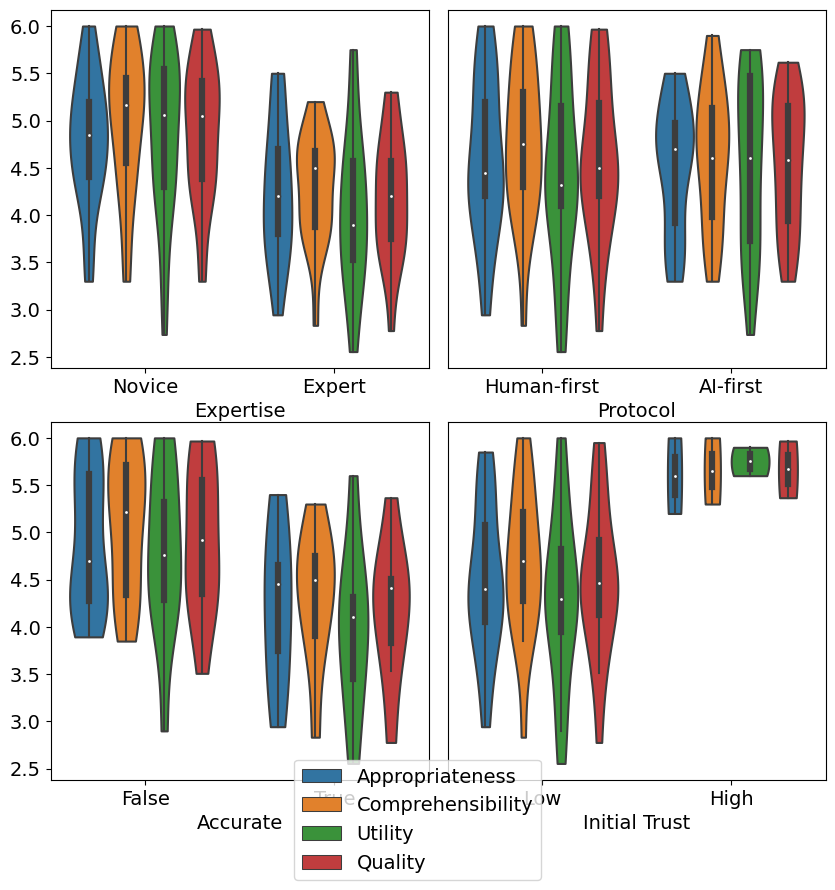

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

sns.violinplot(data=appr_exp, x="Expertise", y="value", hue="variable", cut=0, ax=ax[0,0])
sns.violinplot(data=appr_prot, x="Protocol", y="value", hue="variable", cut=0, ax=ax[0,1])
sns.violinplot(data=appr_acc, x="Accurate", y="value", hue="variable", cut=0, ax=ax[1,0])
sns.violinplot(data=appr_trust, x="Initial Trust", y="value", hue="variable", cut=0, ax=ax[1,1])


#ax1.legend(loc="lower right")
#ax2.legend(loc="lower right")
#v2.legend_.remove()

for r in range(2):
    for c in range(2):
        ax[r,c].set_ylabel("")
        ax[r,c].get_legend().remove()
        
ax[0,1].set_yticks([],[])
ax[1,1].set_yticks([],[])
#ax[0,0].set_ylabel("Trust")
#ax2.set_ylabel("")

ax[0,0].set_xticks([0,1], ["Novice", "Expert"])
ax[0,1].set_xticks([0,1], ["Human-first", "AI-first"])
ax[1,1].set_xticks([0,1], ["Low", "High"])
#ax2.set_yticks([])
#ax2.set_yticklabels([])
handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center')

plt.savefig("quali.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

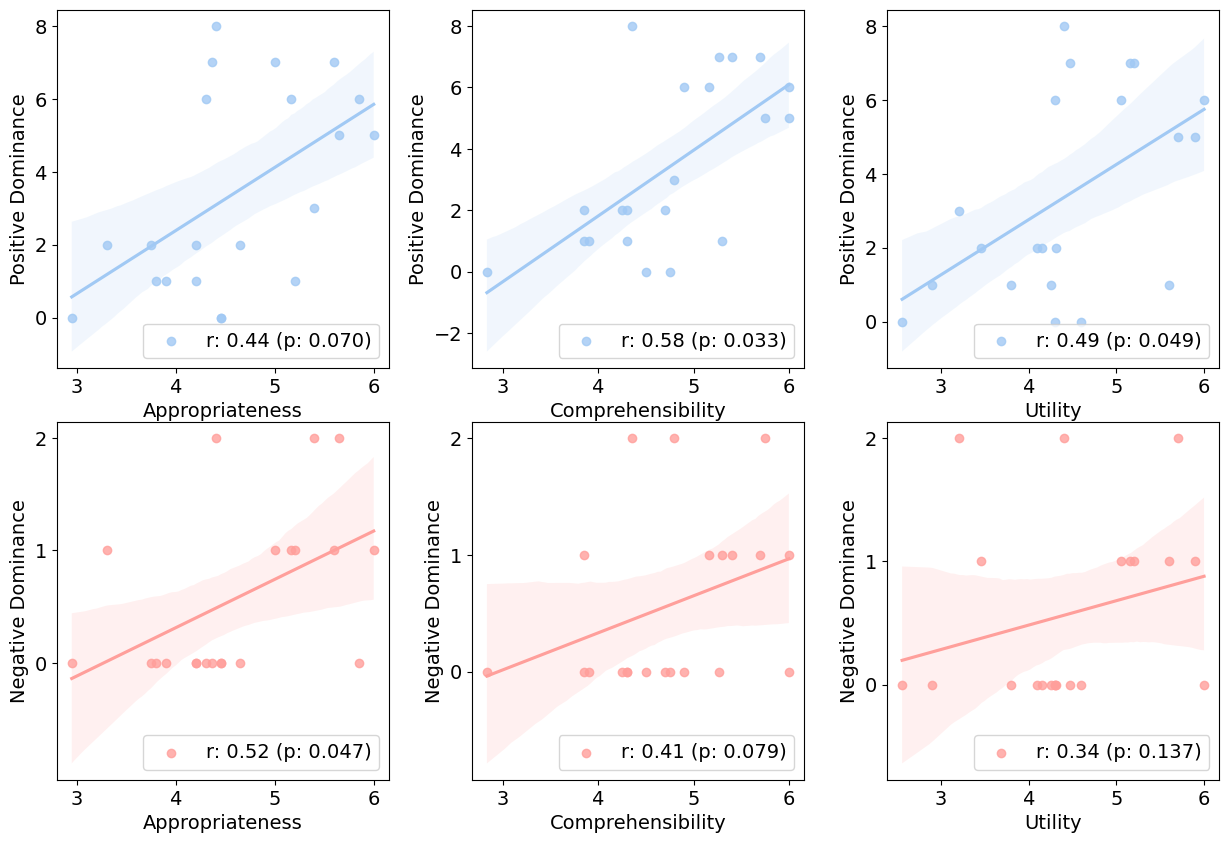

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

rows = ["Positive Dominance", "Negative Dominance"]
cols = ["Appr", "Compr", "Util"]
cs = sns.color_palette("pastel")

vals = np.zeros((2,3))
ps = np.zeros((2,3))

for r in range(2):
    for c in range(3):
        x = data[data["Group"] == "Hound"][cols[c]]
        y = data[data["Group"] == "Hound"][rows[r]]
        
        sns.regplot(x=x, y=y, ax=ax[r,c], color=cs[r*3])
        vals[r,c], ps[r,c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps.reshape(6), method="fdr_bh")[1].reshape(2,3)
for r in range(2):
    for c in range(3):
        ax[r,c].legend(['r: %.2f (p: %.3f)' % (vals[r,c], corrected[r,c])], loc="lower right")

titles = ["Appropriateness", "Comprehensibility", "Utility"]
for c in range(3):
    for r in range(2):
        ax[r,c].set_xlabel(titles[c])
        
for c in range(3):
    ax[1,c].set_yticks([0,1,2])
    
plt.savefig("doms.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

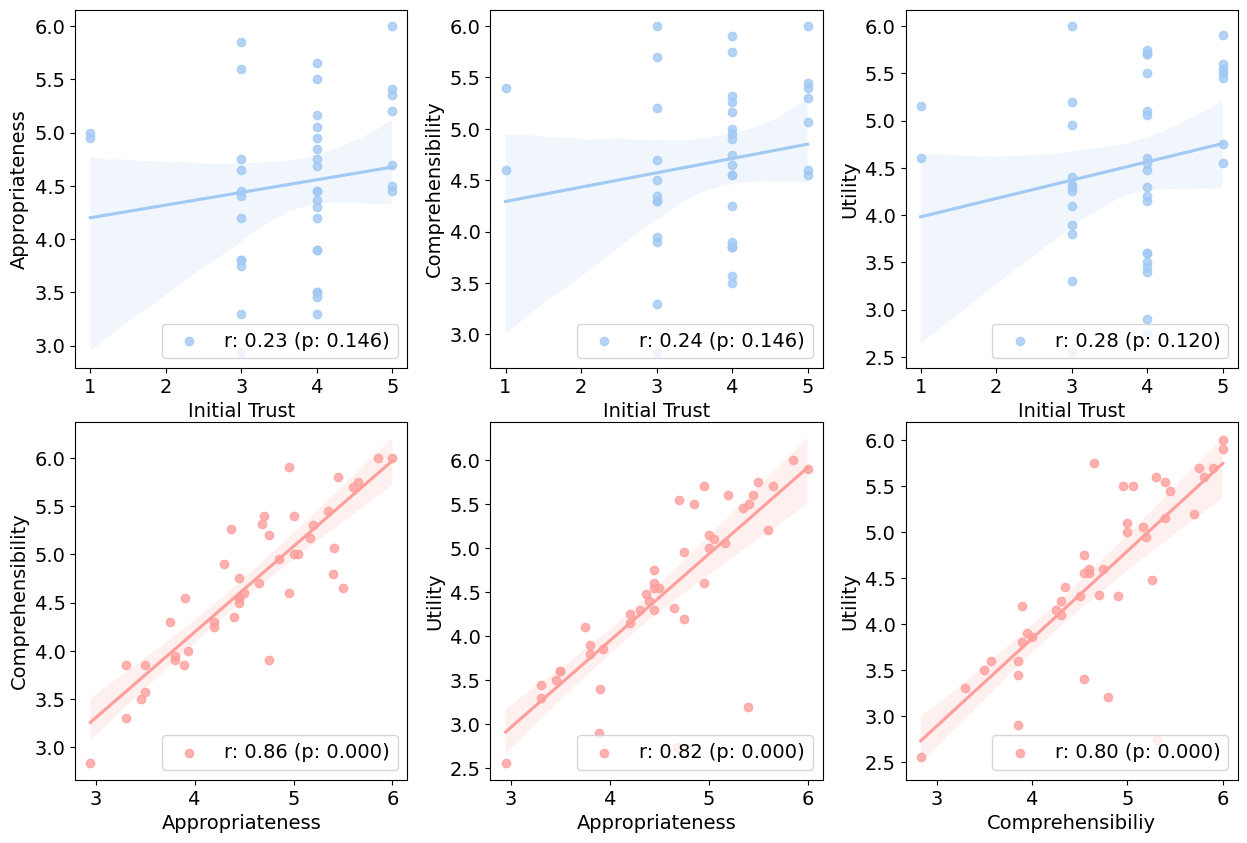

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

pairs = np.array([[ ["Trust1", "Appr"], ["Trust1", "Compr"], ["Trust1", "Util"]],
        [["Appr","Compr"], ["Appr","Util"],["Compr","Util"]]])


vals = np.zeros((2,3))
ps = np.zeros((2,3))

for r in range(2):
    for c in range(3):
        x = data[pairs[r,c][0]]
        y = data[pairs[r,c][1]]
        sns.regplot(x=x, y=y, ax=ax[r,c], color=cs[r*3])
        vals[r,c], ps[r,c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps.reshape(6), method="fdr_bh")[1].reshape(2,3)
for r in range(2):
    for c in range(3):
        ax[r,c].legend(['r: %.2f (p: %.3f)' % (vals[r,c], corrected[r,c])], loc="lower right")

titles_row = np.array([["Initial Trust", "Initial Trust", "Initial Trust"],
             ["Appropriateness", "Appropriateness", "Comprehensibiliy"]])
titles_col = np.array([["Appropriateness", "Comprehensibility", "Utility"],
             ["Comprehensibility", "Utility","Utility"]])

for c in range(3):
    for r in range(2):
        ax[r,c].set_xlabel(titles_row[r,c])
        ax[r,c].set_ylabel(titles_col[r,c])
    
plt.savefig("corrs_quali.png", dpi=300, bbox_inches="tight")

In [37]:
data_xai = data[data["Group"] == "Hound"].loc[:,["XAI","Appropriateness","Comprehensibility","Utility", "HD1", "FHD"]].copy()
s = data_xai.columns.to_series()
data_xai.columns = [data_xai.columns, s.groupby(s).cumcount()]
data_xai = data_xai.stack(1).reset_index()
data_xai["Dominance"] = np.abs(data_xai["FHD"] - data_xai["HD1"])
data_xai["Quality"] = (data_xai["Appropriateness"] + data_xai["Comprehensibility"] + data_xai["Utility"])/3
data_xai = data_xai.groupby(by=["level_0","XAI"]).agg({"Appropriateness": np.mean,
                                                     "Comprehensibility": np.mean,
                                                     "Utility": np.mean,
                                                     "Quality": np.mean,
                                                     "Dominance": np.sum})

data_xai = data_xai.reset_index()
data_xai = data_xai.melt(id_vars="XAI", value_vars=["Appropriateness","Comprehensibility","Utility", "Quality", "Dominance"])
data_xai

,XAI,variable,value
0,0.0,Appropriateness,4.125000
1,1.0,Appropriateness,4.416667
2,0.0,Appropriateness,5.250000
3,1.0,Appropriateness,5.833333
4,0.0,Appropriateness,5.625000
...,...,...,...
205,1.0,Dominance,5.000000
206,0.0,Dominance,2.000000
207,1.0,Dominance,1.000000
208,0.0,Dominance,0.000000


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

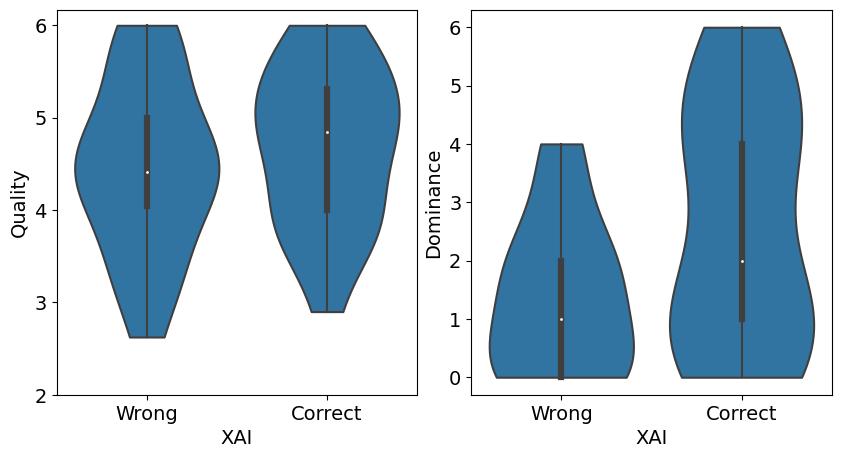

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.15, hspace=0.15)

sns.violinplot(data=data_xai[#(data_xai["variable"] == "Appropriateness") |
                            #(data_xai["variable"] == "Comprehensibility") |
                            #(data_xai["variable"] == "Utility") |
                            (data_xai["variable"] == "Quality")],
               x="XAI", y="value", hue="variable", cut=0, ax=ax[0])
sns.violinplot(data=data_xai[data_xai["variable"] == "Dominance"], x="XAI", y="value", hue="variable", cut=0, ax=ax[1])

ax[0].get_legend().remove()
ax[0].set_yticks([2,3,4,5,6])
ax[0].set_xticks([0,1], ["Wrong", "Correct"])
ax[0].set_ylabel("Quality")

ax[1].get_legend().remove()
ax[1].set_xticks([0,1], ["Wrong", "Correct"])
ax[1].set_ylabel("Dominance")

plt.savefig("quali_xai_violin.png", dpi=300, bbox_inches="tight")

In [39]:
tests = []
effects = []

tests.append( stats.mannwhitneyu(
    data_xai[(data_xai["XAI"] == 0) & (data_xai["variable"] == "Quality")]["value"],
    data_xai[(data_xai["XAI"] == 1) & (data_xai["variable"] == "Quality")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_xai[(data_xai["XAI"] == 0) & (data_xai["variable"] == "Quality")]["value"],
    data_xai[(data_xai["XAI"] == 1) & (data_xai["variable"] == "Quality")]["value"])["RBC"] )

tests.append( stats.mannwhitneyu(
    data_xai[(data_xai["XAI"] == 0) & (data_xai["variable"] == "Dominance")]["value"],
    data_xai[(data_xai["XAI"] == 1) & (data_xai["variable"] == "Dominance")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_xai[(data_xai["XAI"] == 0) & (data_xai["variable"] == "Dominance")]["value"],
    data_xai[(data_xai["XAI"] == 1) & (data_xai["variable"] == "Dominance")]["value"])["RBC"] )

corrected = multi.multipletests(tests, method="fdr_bh")[1]

print(corrected)
print(effects)


[0.39931016 0.12556726]
[MWU    0.154195
Name: RBC, dtype: float64, MWU    0.331066
Name: RBC, dtype: float64]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

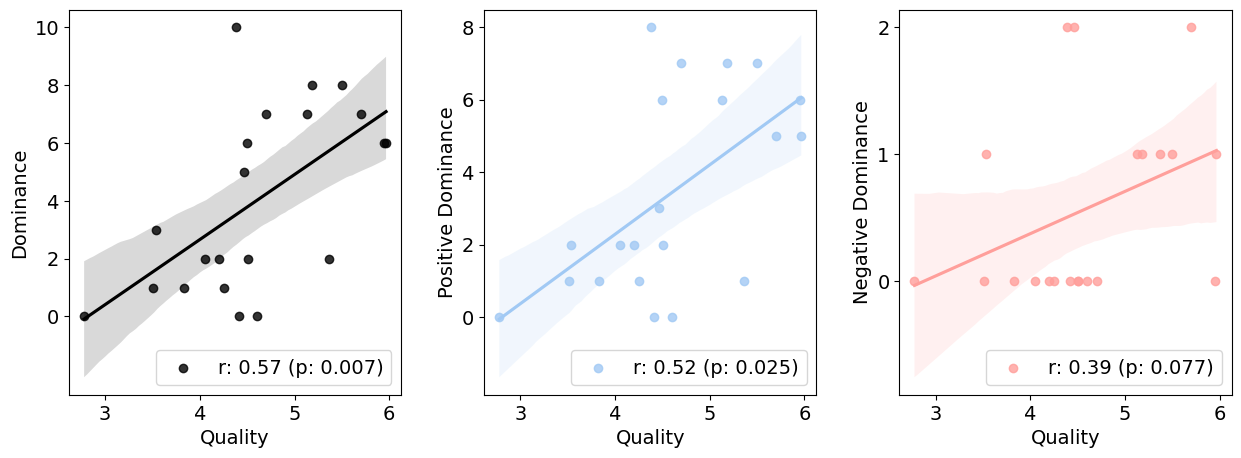

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

cols = ["Dominance", "Positive Dominance", "Negative Dominance"]
cs = sns.color_palette("pastel")
colors = ['k', cs[0], cs[3]]

vals = np.zeros(3)
ps = np.zeros(3)

for c in range(3):
        x = data[data["Group"] == "Hound"]["Quality"]
        y = data[data["Group"] == "Hound"][cols[c]]
        
        sns.regplot(x=x, y=y, ax=ax[c], color=colors[c])
        vals[c], ps[c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps, method="fdr_bh")[1]
corrected[0] = ps[0]
for c in range(3):
    ax[c].legend(['r: %.2f (p: %.3f)' % (vals[c], corrected[c])], loc="lower right")

#titles = ["Appropriateness", "Comprehensibility", "Utility"]
#for c in range(3):
#    for c in range(2):
#        ax[r,c].set_xlabel(titles[c])
ax[0].set_yticks([0,2,4,6,8,10]) 
ax[1].set_yticks([0,2,4,6,8])      
ax[2].set_yticks([0,1,2])
    
plt.savefig("doms_quality_all.png", dpi=300, bbox_inches="tight")

In [41]:
data_dom = data.loc[:,["HD1","FHD","Appropriateness","Comprehensibility","Utility"]].copy()
s = data_dom.columns.to_series()
data_dom.columns = [data_dom.columns, s.groupby(s).cumcount()]
data_dom = data_dom.stack(1).reset_index()
data_dom["Quality"] = (data_dom["Appropriateness"] + data_dom["Comprehensibility"] + data_dom["Utility"])/3
data_dom["Dominance"] = np.abs(data_dom["FHD"] - data_dom["HD1"])
data_dom_melt = data_dom.melt(id_vars=["HD1","FHD","Dominance"], value_vars=["Quality","Appropriateness","Comprehensibility","Utility"])
data_dom_melt = data_dom_melt.dropna()
data_dom_melt

,HD1,FHD,Dominance,variable,value
0,1.0,1.0,0.0,Quality,4.666667
1,0.0,1.0,1.0,Quality,4.666667
2,1.0,1.0,0.0,Quality,4.333333
3,1.0,1.0,0.0,Quality,4.333333
4,0.0,0.0,0.0,Quality,4.333333
...,...,...,...,...,...
3055,0.0,0.0,0.0,Utility,1.000000
3056,0.0,0.0,0.0,Utility,1.000000
3057,1.0,1.0,0.0,Utility,6.000000
3058,0.0,0.0,0.0,Utility,4.000000


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

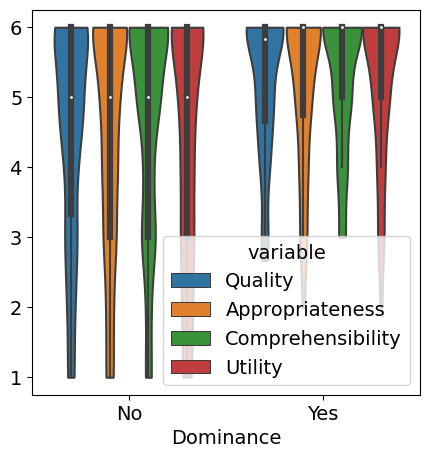

In [42]:
plt.figure(figsize=(5,5))
sns.violinplot(data=data_dom_melt, x="Dominance", y="value", hue="variable", cut=0)
plt.xticks([0,1], ["No", "Yes"])
plt.ylabel("")
plt.savefig("quali_dom_violin.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

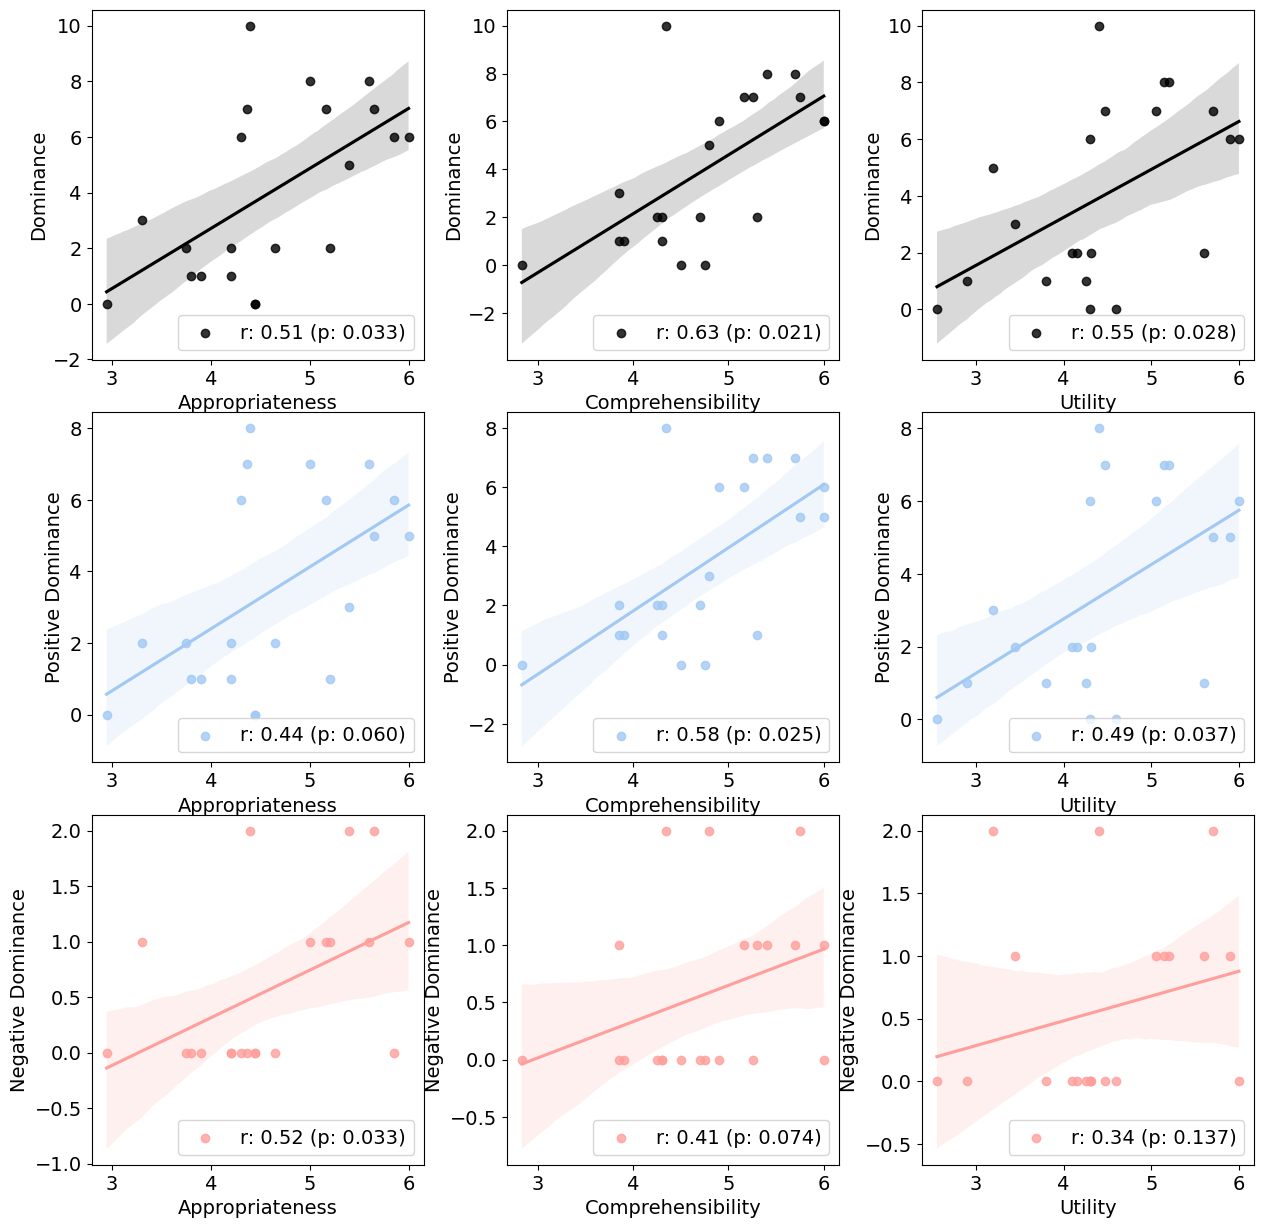

In [43]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

rows = ["Dominance", "Positive Dominance", "Negative Dominance"]
cols = ["Appr", "Compr", "Util"]
cs = sns.color_palette("pastel")

vals = np.zeros((3,3))
ps = np.zeros((3,3))

colors = ["k", cs[0], cs[3]]

for r in range(3):
    for c in range(3):
        x = data[data["Group"] == "Hound"][cols[c]]
        y = data[data["Group"] == "Hound"][rows[r]]
        
        sns.regplot(x=x, y=y, ax=ax[r,c], color=colors[r])
        vals[r,c], ps[r,c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps.reshape(9), method="fdr_bh")[1].reshape(3,3)
for r in range(3):
    for c in range(3):
        ax[r,c].legend(['r: %.2f (p: %.3f)' % (vals[r,c], corrected[r,c])], loc="lower right")

titles = ["Appropriateness", "Comprehensibility", "Utility"]
for c in range(3):
    for r in range(3):
        ax[r,c].set_xlabel(titles[c])
        
    
plt.savefig("doms_all.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

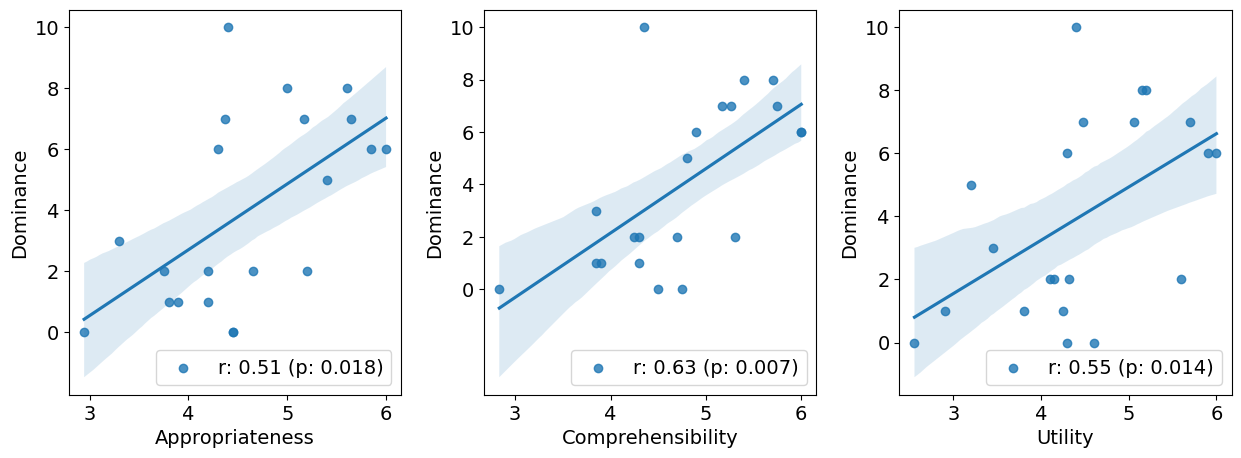

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

rows = ["Dominance"]
cols = ["Appr", "Compr", "Util"]
cs = sns.color_palette("pastel")

vals = np.zeros(3)
ps = np.zeros(3)

for c in range(3):
    x = data[data["Group"] == "Hound"][cols[c]]
    y = data[data["Group"] == "Hound"][rows[0]]

    sns.regplot(x=x, y=y, ax=ax[c])
    vals[c], ps[c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps, method="fdr_bh")[1]
for c in range(3):
    ax[c].legend(['r: %.2f (p: %.3f)' % (vals[c], corrected[c])], loc="lower right")

titles = ["Appropriateness", "Comprehensibility", "Utility"]
for c in range(3):
    ax[c].set_xlabel(titles[c])
    ax[c].set_yticks([0,2,4,6,8,10])
    ax[c].set_xticks([3,4,5,6])
        
    
plt.savefig("doms_tot.png", dpi=300, bbox_inches="tight")

In [45]:
data_cron = data.loc[:,["Appropriateness","Comprehensibility","Utility"]].copy()
s = data_cron.columns.to_series()
data_cron.columns = [data_cron.columns, s.groupby(s).cumcount()]
data_cron = data_cron.stack(1).reset_index()
data_cron

,level_0,level_1,Appropriateness,Comprehensibility,Utility
0,0,0,5.0,4.0,5.0
1,0,1,5.0,4.0,5.0
2,0,2,4.0,5.0,4.0
3,0,3,4.0,5.0,4.0
4,0,4,4.0,5.0,4.0
...,...,...,...,...,...
839,43,15,1.0,3.0,1.0
840,43,16,2.0,4.0,2.0
841,43,17,5.0,4.0,6.0
842,43,18,6.0,6.0,6.0


In [46]:
pingouin.cronbach_alpha(data=data_cron.loc[:,["Appropriateness","Comprehensibility","Utility"]])

(0.9285751138975659, array([0.92 , 0.937]))

In [47]:
tests = []
effects = []

tests.append( stats.mannwhitneyu(data[data["Accurati"] == False]["Quality"], data[data["Accurati"] == True]["Quality"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Accurati"] == False]["Quality"], data[data["Accurati"] == True]["Quality"])["RBC"] )

tests.append( stats.mannwhitneyu(data[data["Expertise"] == 1]["Quality"], data[data["Expertise"] == 2]["Quality"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Expertise"] == 1]["Quality"], data[data["Expertise"] == 2]["Quality"])["RBC"] )

tests.append( stats.mannwhitneyu(data[data["Group"] == "Hound"]["Quality"], data[data["Group"] == "Ram"]["Quality"],
                  nan_policy="omit").pvalue )
effects.append( pingouin.mwu(data[data["Group"] == "Hound"]["Quality"], data[data["Group"] == "Ram"]["Quality"])["RBC"] )

corrected = multi.multipletests(tests, method="fdr_bh")[1]

print(corrected)
print(effects)

[0.15485517 0.01243273 0.9812539 ]
[MWU   -0.35873
Name: RBC, dtype: float64, MWU   -0.511579
Name: RBC, dtype: float64, MWU   -0.006211
Name: RBC, dtype: float64]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

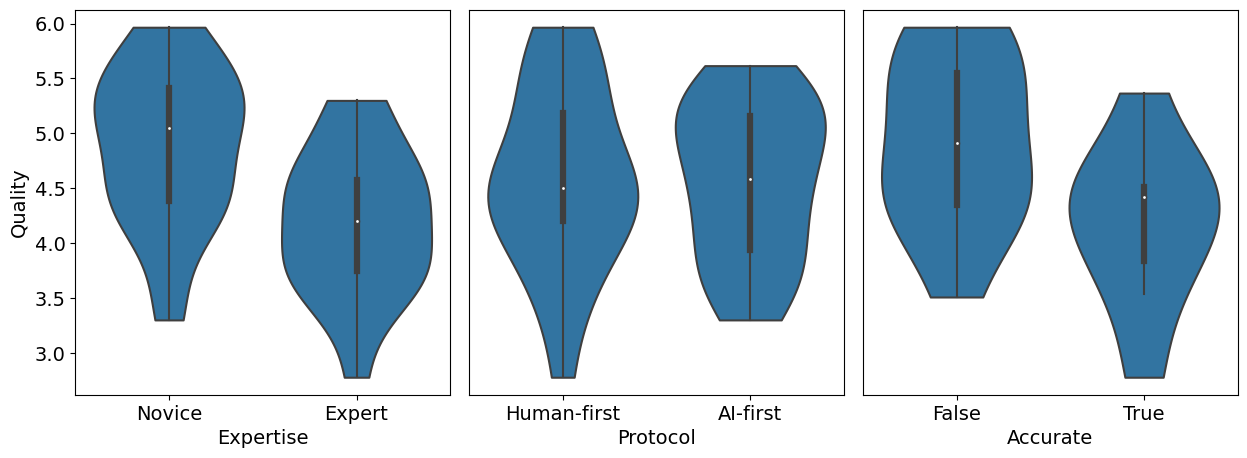

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.05, hspace=0.15)

sns.violinplot(data=appr_exp[appr_exp["variable"] == "Quality"], x="Expertise", y="value", hue="variable", cut=0, ax=ax[0])
sns.violinplot(data=appr_prot[appr_prot["variable"] == "Quality"], x="Protocol", y="value", hue="variable", cut=0, ax=ax[1])
sns.violinplot(data=appr_acc[appr_acc["variable"] == "Quality"], x="Accurate", y="value", hue="variable", cut=0, ax=ax[2])
#sns.violinplot(data=appr_trust[appr_trust["variable"] == "Quality"], x="Initial Trust", y="value", hue="variable", cut=0, ax=ax[1,1])

#ax1.legend(loc="lower right")
#ax2.legend(loc="lower right")
#v2.legend_.remove()

for r in range(3):
        ax[r].set_ylabel("")
        ax[r].get_legend().remove()
        
ax[1].set_yticks([],[])
ax[2].set_yticks([],[])
ax[0].set_ylabel("Quality")
#ax[1,0].set_ylabel("Quality")

#ax2.set_ylabel("")

ax[0].set_xticks([0,1], ["Novice", "Expert"])
ax[1].set_xticks([0,1], ["Human-first", "AI-first"])
#ax[2].set_xticks([0,1], ["Low", "High"])
#ax2.set_yticks([])
#ax2.set_yticklabels([])
#handles, labels = ax[1,1].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center')

plt.savefig("quality_strats.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

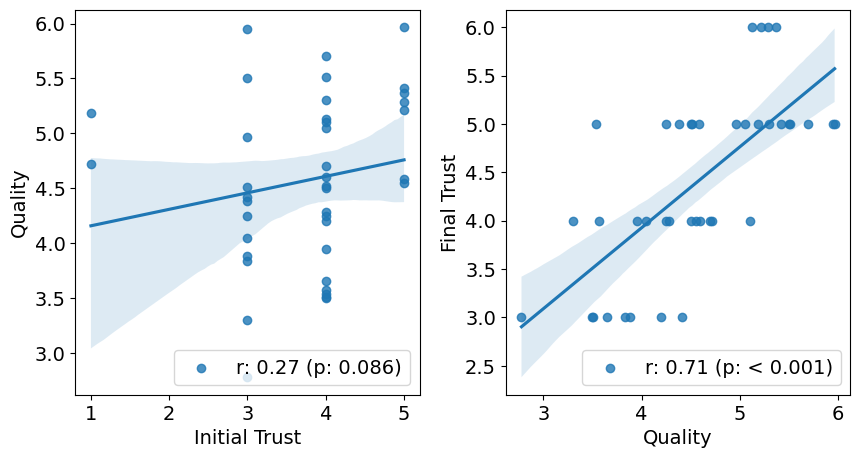

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

pairs = np.array([ ["Trust1", "Quality"], ["Quality", "Trust2"]])


vals = np.zeros(2)
ps = np.zeros(2)

for c in range(2):
    x = data[pairs[c][0]]
    y = data[pairs[c][1]]
    sns.regplot(x=x, y=y, ax=ax[c])
    vals[c], ps[c] = stats.spearmanr(x, y, nan_policy="omit")

corrected = multi.multipletests(ps, method="fdr_bh")[1]
for c in range(2):
    ax[c].legend(['r: %.2f (p: %s)' % (vals[c], "%.3f" % corrected[c] if corrected[c] > 0.001 else "< 0.001")], loc="lower right")

titles_row = np.array(["Initial Trust", "Quality"])
titles_col = np.array(["Quality", "Final Trust"])

for r in range(2):
    ax[r].set_xlabel(titles_row[r])
    ax[r].set_ylabel(titles_col[r])
    
plt.savefig("corrs_quality_trust.png", dpi=300, bbox_inches="tight")

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

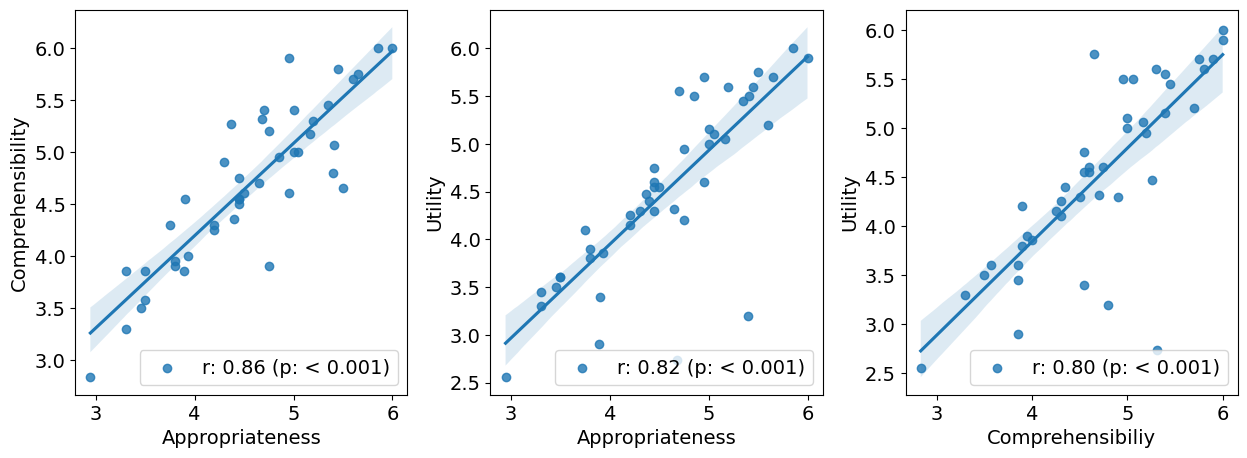

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.25, hspace=0.15)

pairs = np.array([["Appr","Compr"], ["Appr","Util"],["Compr","Util"]])


vals = np.zeros(3)
ps = np.zeros(3)

for c in range(3):
    x = data[pairs[c][0]]
    y = data[pairs[c][1]]
    sns.regplot(x=x, y=y, ax=ax[c])
    vals[c], ps[c] = stats.spearmanr(x, y, nan_policy="omit")
        
corrected = multi.multipletests(ps, method="fdr_bh")[1]
for c in range(3):
    ax[c].legend(['r: %.2f (p: %s)' % (vals[c], "%.3f" % corrected[c] if corrected[c] > 0.001 else "< 0.001")], loc="lower right")

titles_row = np.array(["Appropriateness", "Appropriateness", "Comprehensibiliy"])
titles_col = np.array(["Comprehensibility", "Utility","Utility"])

for c in range(3):
    ax[c].set_xlabel(titles_row[c])
    ax[c].set_ylabel(titles_col[c])
    
plt.savefig("corrs_quali_only.png", dpi=300, bbox_inches="tight")

In [51]:
data_pair = data[data["Group"] == "Hound"].loc[:,["AI","XAI","Appropriateness","Comprehensibility","Utility", "HD1", "FHD"]].copy()
s = data_pair.columns.to_series()
data_pair.columns = [data_pair.columns, s.groupby(s).cumcount()]
data_pair = data_pair.stack(1).reset_index()
data_pair["Dominance"] = np.abs(data_pair["FHD"] - data_pair["HD1"])
data_pair["Quality"] = (data_pair["Appropriateness"] + data_pair["Comprehensibility"] + data_pair["Utility"])/3
data_pair = data_pair.groupby(by=["level_0","AI","XAI"]).agg({"Appropriateness": np.mean,
                                                     "Comprehensibility": np.mean,
                                                     "Utility": np.mean,
                                                     "Quality": np.mean,
                                                     "Dominance": np.sum})

data_pair = data_pair.reset_index()
data_pair = data_pair.melt(id_vars=["AI","XAI"], value_vars=["Appropriateness","Comprehensibility","Utility", "Quality", "Dominance"])
#data_pair["AI"] = data_pair["AI"].apply(lambda x: "Correct" if x == 1 else "Wrong")
data_pair

,AI,XAI,variable,value
0,0.0,0.0,Appropriateness,4.25
1,0.0,1.0,Appropriateness,5.00
2,1.0,0.0,Appropriateness,4.00
3,1.0,1.0,Appropriateness,4.30
4,0.0,0.0,Appropriateness,5.75
...,...,...,...,...
415,1.0,1.0,Dominance,1.00
416,0.0,0.0,Dominance,0.00
417,0.0,1.0,Dominance,0.00
418,1.0,0.0,Dominance,0.00


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


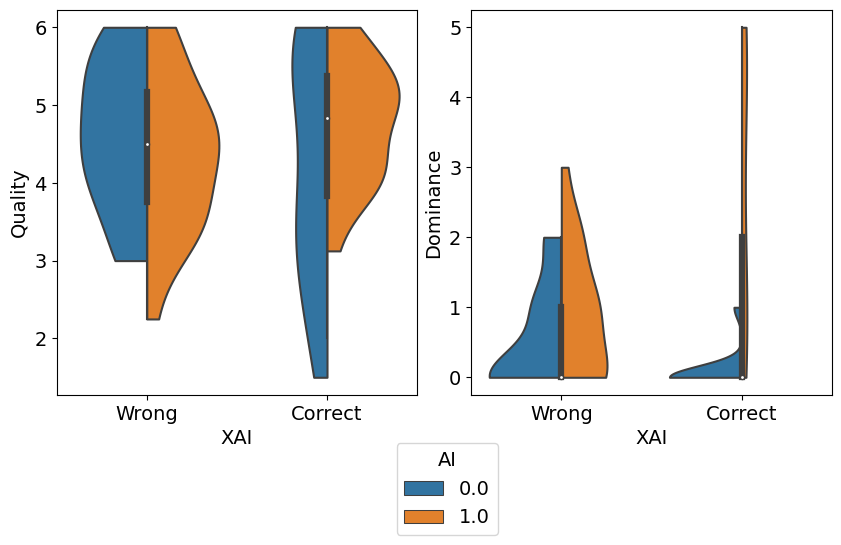

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.15, hspace=0.15)

sns.violinplot(data=data_pair[#(data_xai["variable"] == "Appropriateness") |
                            #(data_xai["variable"] == "Comprehensibility") |
                            #(data_xai["variable"] == "Utility") |
                            (data_pair["variable"] == "Quality")],
               x="XAI", y="value", hue="AI", cut=0, ax=ax[0],
              split=True)
sns.violinplot(data=data_pair[data_pair["variable"] == "Dominance"], x="XAI", y="value", hue="AI", cut=0, ax=ax[1],
              split=True)


#ax[0].get_legend().remove()
ax[0].legend(title="AI", bbox_to_anchor=(1.25, -0.1))
ax[0].set_yticks([2,3,4,5,6])
ax[0].set_xticks([0,1], ["Wrong", "Correct"])
ax[0].set_ylabel("Quality")

ax[1].get_legend().remove()
ax[1].set_xticks([0,1], ["Wrong", "Correct"])
ax[1].set_ylabel("Dominance")

plt.savefig("quali_ai_xai_violin.png", dpi=300, bbox_inches="tight")

In [53]:
tests = []
effects = []

tests.append( stats.mannwhitneyu(
    data_pair[(data_pair["XAI"] == 0) & (data_pair["variable"] == "Quality")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["variable"] == "Quality")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_pair[(data_pair["XAI"] == 0) & (data_pair["variable"] == "Quality")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["variable"] == "Quality")]["value"])["RBC"] )

tests.append( stats.mannwhitneyu(
    data_pair[(data_pair["XAI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["variable"] == "Dominance")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_pair[(data_pair["XAI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["variable"] == "Dominance")]["value"])["RBC"] )

tests.append( stats.mannwhitneyu(
    data_pair[(data_pair["AI"] == 0) & (data_pair["variable"] == "Quality")]["value"],
    data_pair[(data_pair["AI"] == 1) & (data_pair["variable"] == "Quality")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_pair[(data_pair["AI"] == 0) & (data_pair["variable"] == "Quality")]["value"],
    data_pair[(data_pair["AI"] == 1) & (data_pair["variable"] == "Quality")]["value"])["RBC"] )

tests.append( stats.mannwhitneyu(
    data_pair[(data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"],
    nan_policy="omit").pvalue )
effects.append( pingouin.mwu(
    data_pair[(data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"])["RBC"] )

corrected = multi.multipletests(tests, method="fdr_bh")[1]

print(corrected)
print(effects)


[7.91402140e-01 7.91402140e-01 7.91402140e-01 3.07198599e-05]
[MWU    0.058072
Name: RBC, dtype: float64, MWU    0.069728
Name: RBC, dtype: float64, MWU    0.034262
Name: RBC, dtype: float64, MWU    0.518141
Name: RBC, dtype: float64]


In [54]:
tests = []
effects = []


print(stats.kruskal(
    data_pair[(data_pair["XAI"] == 0) & (data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 0) & (data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"]
))

for x1 in [0,1]:
    for a1 in [0,1]:
        for x2 in [0,1]:
            for a2 in [0,1]:
                cond1 = (data_pair["XAI"] == x1) & (data_pair["AI"] == a1) & (data_pair["variable"] == "Dominance")
                cond2 = (data_pair["XAI"] == x2) & (data_pair["AI"] == a2) & (data_pair["variable"] == "Dominance")
                effects.append( pingouin.mwu(
                    data_pair[cond1]["value"],
                    data_pair[cond2]["value"])["RBC"].values[0]
                )


effects = pd.DataFrame(np.array(effects).reshape((4,4)))

print(corrected)
print(effects)
effects.columns = ["AI Wrong\nXAI Wrong", "AI Correct\nXAI Wrong", "AI Wrong\nXAI Correct", "AI Correct\nXAI Correct"]
effects.index = ["AI Wrong\nXAI Wrong", "AI Correct\nXAI Wrong", "AI Wrong\nXAI Correct", "AI Correct\nXAI Correct"]

KruskalResult(statistic=28.810133664761334, pvalue=2.454876325889057e-06)
[7.91402140e-01 7.91402140e-01 7.91402140e-01 3.07198599e-05]
          0         1         2         3
0  0.000000  0.206349 -0.299320  0.598639
1 -0.206349  0.000000 -0.498866  0.478458
2  0.299320  0.498866  0.000000  0.768707
3 -0.598639 -0.478458 -0.768707  0.000000


In [55]:
import scikit_posthocs

pvalues = scikit_posthocs.posthoc_nemenyi_friedman(np.array([
    data_pair[(data_pair["XAI"] == 0) & (data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 0) & (data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["AI"] == 0) & (data_pair["variable"] == "Dominance")]["value"],
    data_pair[(data_pair["XAI"] == 1) & (data_pair["AI"] == 1) & (data_pair["variable"] == "Dominance")]["value"]
]).T)

pvalues.columns = ["AI Wrong\nXAI Wrong", "AI Correct\nXAI Wrong", "AI Wrong\nXAI Correct", "AI Correct\nXAI Correct"]
pvalues.index = ["AI Wrong\nXAI Wrong", "AI Correct\nXAI Wrong", "AI Wrong\nXAI Correct", "AI Correct\nXAI Correct"]
pvalues

,AI Wrong\nXAI Wrong,AI Correct\nXAI Wrong,AI Wrong\nXAI Correct,AI Correct\nXAI Correct
AI Wrong\nXAI Wrong,1.000000,0.714897,0.580720,0.001908
AI Correct\nXAI Wrong,0.714897,1.000000,0.104889,0.049904
AI Wrong\nXAI Correct,0.580720,0.104889,1.000000,0.001000
AI Correct\nXAI Correct,0.001908,0.049904,0.001000,1.000000


In [ ]:
from statsmodels.stats import multitest as stmmulti
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(10,10))

pvalues_annot = pvalues.applymap("{0:.3f}".format).astype(str)

cdict = {'red':   [[0.0,  1.0, 1.0],
                   [1.0, 1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.67, 1.0, 1.0],
                   [1.0, 1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.67, 1.0, 1.0],
                   [1.0, 1.0, 1.0]]}
cmap =  colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=2048)



matrix = np.tril(pvalues)
ones = np.triu(np.ones(matrix.shape))
matrix += ones
matrix = pd.DataFrame(matrix, index=pvalues.index, columns = pvalues.index)
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
norm = colors.LogNorm(vmin=0.001, vmax=1)

cax = inset_axes(ax,
                 width="5%",  # width: 40% of parent_bbox width
                 height="100%",  # height: 10% of parent_bbox height
                 bbox_to_anchor=(-0.15, 0, 1, 1),
                 loc="lower left",
                 bbox_transform=ax.transAxes,
                 borderpad=0
                 )
cax.yaxis.set_ticks_position('left')

hm1 = sns.heatmap(matrix, 
                mask=mask, linewidth=1, linecolor='black',
                annot=pvalues_annot, fmt="s",
                cmap=cmap, cbar=True, norm=norm, vmin=0, vmax=1, ax=ax,
                cbar_ax=cax)
colorbar1 = hm1.collections[0].colorbar
colorbar1.ax.set_yticks([0.001,  0.01, 0.05, 0.1, 1])
colorbar1.ax.set_yticklabels(["< 0.001", 0.01, 0.05, 0.1, 1])
colorbar1.outline.set_edgecolor('black')
colorbar1.outline.set_linewidth(1)
colorbar1.ax.yaxis.set_ticks_position("left")
colorbar1.ax.set_xlabel('p-value\n(adjusted)')




cdict = {'red':   [[0.0,  1.0, 1.0],
                   [1.0, 0.0, 0.0]],
         'green': [[0.0,  1.0, 1.0],
                   [1.0, 0.0, 0.0]],
         'blue':  [[0.0,  1.0, 1.0],
                   [1.0, 1.0, 1.0]]}
cmap =  colors.LinearSegmentedColormap('testCmap', segmentdata=cdict, N=2048)

matrix = np.triu(np.abs(effects))
matrix = pd.DataFrame(matrix, index=effects.index, columns = effects.index)
mask = np.zeros_like(matrix, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
hm2 = sns.heatmap(matrix, 
                mask=mask, linewidth=1, linecolor='black',
                annot=True, fmt=".2f",
                cmap=cmap, cbar=True, vmin=0, vmax=1, ax=ax)

colorbar2 = hm2.collections[1].colorbar
#colorbar2.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#colorbar2.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
colorbar2.outline.set_edgecolor('black')
colorbar2.outline.set_linewidth(1)
colorbar2.ax.set_xlabel('Effect size\n(RBC)')






plt.savefig("ai_xai_dominance.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_574/543586999.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matrix, dtype=np.bool)
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

In [ ]:
scikit_posthocs.__version__